In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
from myshow import myshow, myshow3d

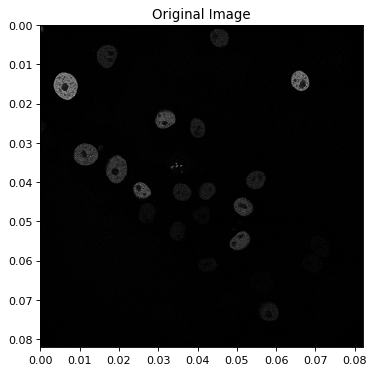

In [34]:
rgb_img = sitk.ReadImage("t009_resized_small.tif")
myshow(rgb_img, "Original Image")

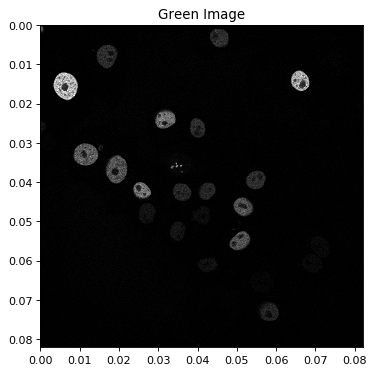

In [39]:
img = sitk.VectorIndexSelectionCast(rgb_img,1)
myshow(img, "Green Image")

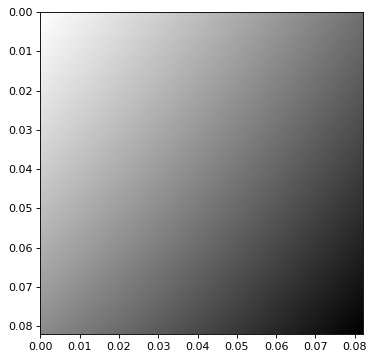

In [36]:
feature_img = sitk.GradientMagnitudeRecursiveGaussian(img, sigma=0.2)
myshow(feature_img)

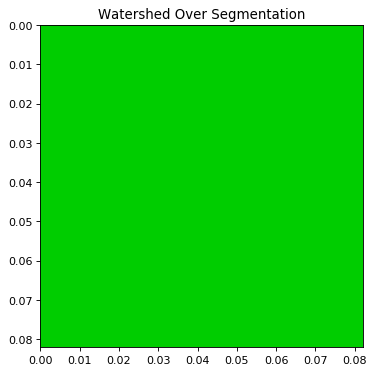

In [37]:
ws_img = sitk.MorphologicalWatershed(feature_img, level=4, markWatershedLine=False, fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Over Segmentation")

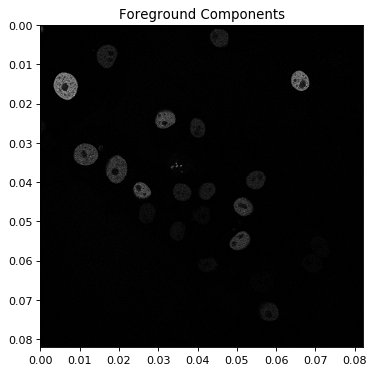

In [38]:
seg = sitk.ConnectedComponent(ws_img!=ws_img[0,0])
myshow(sitk.LabelOverlay(img, seg), "Foreground Components")